In [67]:
import pylab
import numpy as np
import math
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


#### 2.1.10.
Даны два уравнения $f(x)=0$ и $g(x)=0$. Найти с точностью
$\epsilon=1e-10$ все корни уравнений, содержащиеся на отрезке $[a, b]$. Для решения задачи использовать метод бисекции. 
$$f(x) = \tan^2(x)+(\sqrt{3}-1)*\tan(x)-\sqrt{3}$$


$$g(x) = \tan^2(x) - 2*\tan(x)+1$$

Решим задачу аналитически. 

$$f(x)=\tan^2(x)+(\sqrt{3}-1)*\tan(x)-\sqrt{3} = 0$$
$$ ] tan(x) = t $$

$$t^2+(\sqrt{3}-1)t-\sqrt{3} = 0$$

$$D = (\sqrt{3}-1)^2 + 4\sqrt{3} = 7.4641$$ 

$$t_1 = \frac{-\sqrt{3}+1+\sqrt{7.4641}}{2} = 1$$

$$t_2 = \frac{-\sqrt{3}+1-\sqrt{7.4641}}{2} = -1.73205$$

Отсюда 

$$x_1 = \arctan(1) = 0.78539$$

$$x_2 = \arctan(-1.73205) = -1.04719$$

In [2]:
D = (math.sqrt(3)-1)**2 + 4*math.sqrt(3)
t1 = (-math.sqrt(3)+1+math.sqrt(7.4641))/2
t2 = (-math.sqrt(3)+1-math.sqrt(7.4641))/2
t3 = 1
print(D,t1,t2)
x1 = math.atan(t1)
x2 = math.atan(t2)
x3 = math.atan(t3)
print(x1,x2,x3)

7.464101615137754 0.9999998522046298 -1.732050659773507
0.7853980894997578 -1.0471975142477528 0.7853981633974483


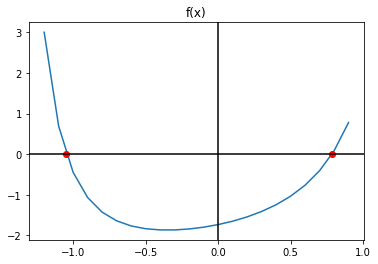

In [11]:
X = np.arange(a, b, 0.1)
plt.plot(X, [f(x) for x in X])
ax = plt.subplot()
ax.plot(x1, f(x1) , "or")
ax.plot(x2, f(x2) , "or")

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title("f(x)")

plt.axes()
plt.show()

$$g(x) = \tan^2(x) - 2*\tan(x)+1=0$$
$$ ] tan(x) = t $$

$$t^2-2t+1=0$$

$$D = 4 - 4 = 0$$

$$t_3 = \frac{2}{2} = 1$$

$$x_3 = \arctan(1) = 0.78539$$

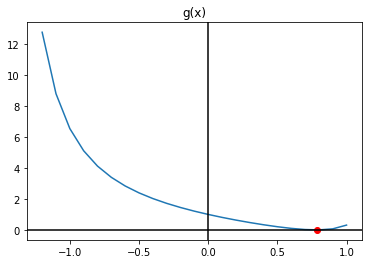

In [10]:
X = np.arange(a, b+0.1, 0.1)
plt.plot(X, [g(x) for x in X])
ax = plt.subplot()
ax.plot(x3, g(x3) , "or")

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title("g(x)")

plt.axes()
plt.show()

Теперь воспользуемся методом бисекции. Алгоритм заключается в следующем:
* делим отрезок пополам
* далее выбираем ту половину, на которой функция меняет свой знак
* продолжаем данный итеративный процесс до тех пор, пока функция не приблизится к нулю с заданной точностью

In [22]:
f =  lambda x: math.tan(x)**2+(math.sqrt(3)-1)*math.tan(x)-math.sqrt(3)
g = lambda x: math.tan(x)**2 - 2*math.tan(x)+1

a, b = -1.2, 1


def half_divide_method(a, b, f, e, max_iter = 1e5, start_left = True):
    x = (a + b) / 2
    iter_count = 0
    while math.fabs(f(x)) >= e:
        x = (a + b) / 2
        if start_left :
            a, b = (a, x) if f(a) * f(x) < 0 else (x, b)
        else:
            a, b = (x, b) if f(b) * f(x) < 0 else (a, x) 
        iter_count += 1
        if iter_count == max_iter:
            return "Doesnt converge"
    return (a + b) / 2


print("Solution for f is ", half_divide_method(a, b, f, 1e-10))
print("Solution for f is ", half_divide_method(a, b, f, 1e-10, start_left = False))
print("Solution for g is ", half_divide_method(a, b, g, 1e-10))

Solution for f is  -1.0471975511951317
Solution for f is  0.7853981634034426
Solution for g is  Doesnt converge


In [23]:
f =  lambda x: math.tan(x)**2+(math.sqrt(3)-1)*math.tan(x)-math.sqrt(3)
g = lambda x: math.tan(x)**2 - 2*math.tan(x)+1

from scipy import optimize
for i in [-0.5,0.5]:
    sol = optimize.root(f, i)
    print(sol.x[0])

-1.0471975511965976
0.7853981633974401


С помощью метода бисекции не удалось получить решение для функции $g(x)$, так как данная функция не принимает отрицательных значений на всей области определения. То есть на концах отрезка функция принимает один знак. 

#### 2.5.2.
 Найти приближенно корень уравнения $f(x)=0$, принадлежащий отрезку $[a,b]$, с точностью $\epsilon = 1e-5$ , используя модификацию метода Ньютона для случая кратного корня при значениях $m=1,2,3,4,5$. По
числу итераций определить кратность корня.

$$f(x) = 144\sin(x) + 12\sqrt{3}\pi + 36x^2 + \pi^2 - 72 - 12\pi x - 72\sqrt{3}x$$

$$ [a,b] = [0.3,0.7]$$

Метод Ньютона для случая кратного корня обладает лишь линейной скоростью сходимости. Чтобы сохранить квадратичную сходимость его модифицируют следующим образом:

$$x_{n+1}=x_n - \frac{m f(x_n)}{f'(x_n)}$$ , где $m$ - кратность корня. Как правило, значение $m$ неизвестно. Используя метод Ньютона, можно узнать кратность корня. Для этого будем задавать значения $m$ = 1,2,3,4,5, и вычислять значение корня с заданной точностью, одновременно подсчитывая количество итераций для каждого значения . При некотором значении  число итераций будет минимальным. Это значение  и есть кратность корня.

In [24]:
f1 =  lambda x: 144*math.sin(x) + 12*math.sqrt(3)*math.pi + 36*x**2 + math.pi**2 - 72 - 12*math.pi*x - 72*math.sqrt(3)*x

In [25]:
from scipy.misc import derivative
a = 0.3 
b = 0.7
def newtons_method(a, b, f, m, e):
    iter_count = 1
    x0 = (a + b) / 2
    x1 = x0 - m*(f(x0) / derivative(f, x0, dx=1e-6))
    while True:
        if math.fabs(x1 - x0) < e: return x1,iter_count
        x0 = x1
        x1 = x0 - (f(x0) / derivative(f, x0, dx=1e-6))
        iter_count += 1

In [26]:
for i in range(1,6):
    answer = newtons_method(a, b, f1, i, 1e-5)
    print("Solution for m =", i ," is ", answer[0] , " after ", answer[1], " iterations" )

Solution for m = 1  is  0.5235889928301907  after  19  iterations
Solution for m = 2  is  0.523581020656048  after  16  iterations
Solution for m = 3  is  0.5235889415289582  after  3  iterations
Solution for m = 4  is  0.5236162826107776  after  16  iterations
Solution for m = 5  is  0.5236093518186958  after  18  iterations


Таким образом, кратность корня = 3

In [27]:
res = optimize.root(f1, 0)
res.x[0]

0.5235901057255506

#### 2.10.4.
Функция $y=f(x)$ задана неявно уравнением $F(x,y)=0$.На отрезке $[1, 5]$ построить таблицу значений
функции $y=f(x)$ с шагом $h=0.5$, применяя один из методов численного решения нелинейного уравнения (с точностью $\epsilon = 1e-7$).Построить график функции $y=f(x)$ на заданном отрезке.

$$\exp(xy) - \cos(x\sqrt[3]{y}) = 0$$

In [129]:
def F(x, y):
    return math.exp(x*y)-math.cos(x*math.pow(y,1/3))

x_space = np.arange(1, 5.5, 0.5)
y_space = []

for x in x_space:
    def j(y):
        return f10(x, y)
    y_space.append(half_divide_metod(j, 0, 1.2, 1e-7))

In [130]:
table = np.array([x_space, y_space]).T
print(table)

[[1.00000000e+00 3.57627869e-08]
 [1.50000000e+00 3.57627869e-08]
 [2.00000000e+00 3.57627869e-08]
 [2.50000000e+00 3.57627869e-08]
 [3.00000000e+00 3.57627869e-08]
 [3.50000000e+00 3.57627869e-08]
 [4.00000000e+00 3.57627869e-08]
 [4.50000000e+00 3.57627869e-08]
 [5.00000000e+00 3.57627869e-08]]


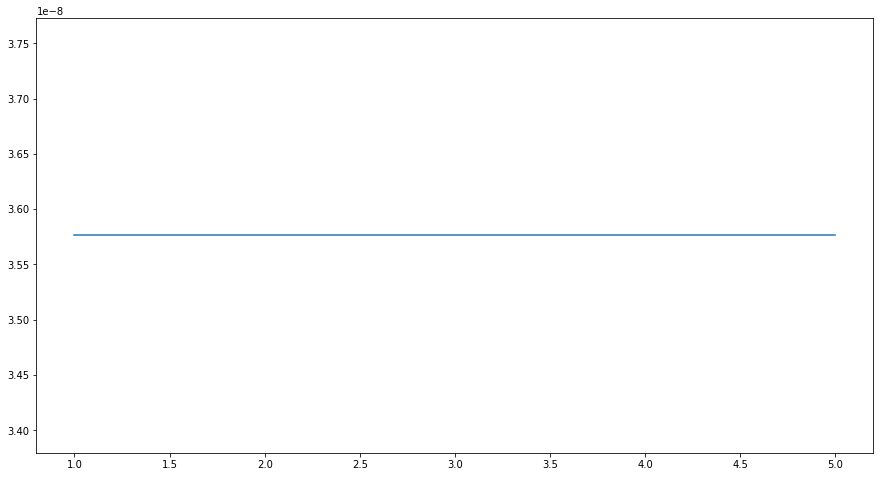

In [131]:
plt.figure(figsize=(15, 8))
plt.plot(table[:, 0], table[:, 1])

In [95]:
#F = lambda x,y: math.exp(x*y)-math.cos(x*math.pow(y,1/3))

In [122]:
def half_divide_metod(f, a, b, eps):
    dx = float(b-a)/2
    mid = a + dx
    
    while float(b-a) > eps:
        if np.sign(f(a)) != np.sign(f(mid)):
            b = mid
        else:
            a = mid
        dx /= 2
        mid = a + dx
    return mid

In [114]:
x_space = np.arange(1, 5.5, 0.5)
y_space = []

for x in x_space:
    def j(y):
        return f10(x, y)
    y_space.append(bisec(j, 0, 1.2, 1e-7))

In [115]:
table = np.array([x_space, y_space]).T

In [116]:
table

array([[1.00000000e+00, 3.57627869e-08],
       [1.50000000e+00, 3.57627869e-08],
       [2.00000000e+00, 3.57627869e-08],
       [2.50000000e+00, 3.57627869e-08],
       [3.00000000e+00, 3.57627869e-08],
       [3.50000000e+00, 3.57627869e-08],
       [4.00000000e+00, 3.57627869e-08],
       [4.50000000e+00, 3.57627869e-08],
       [5.00000000e+00, 3.57627869e-08]])

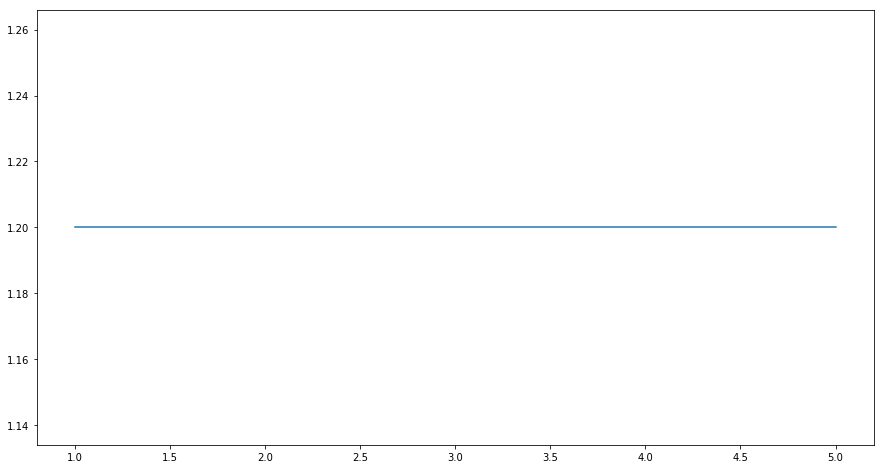

In [86]:
plt.figure(figsize=(15, 8))
plt.plot(table[:, 0], table[:, 1])

In [101]:
import numpy as np
for i in np.arange(1,5,0.5):
    f = lambda y: F(i,y)
    answer = bisec(f, 0.1, 1.2, 1e-7)
    res = optimize.root(f, 0)
    print(res.x[0])
    print(answer)